# Assignment 12: EDA2

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
import ppscore as pps  # pip install ppscore

## Step 1: Data Exploration and preprocessing

In [2]:
# Load dataset
df = pd.read_csv("adult_with_headers.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [5]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
print(df.shape)

(32561, 15)


In [7]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [8]:
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


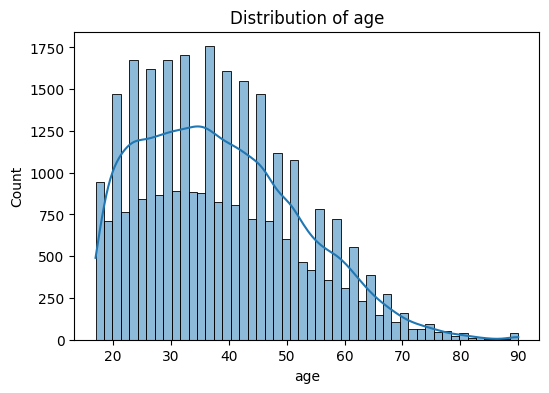

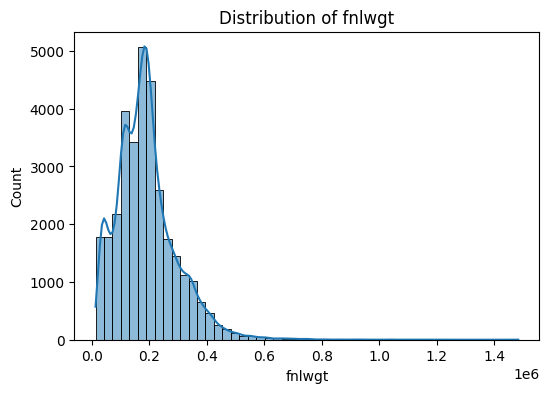

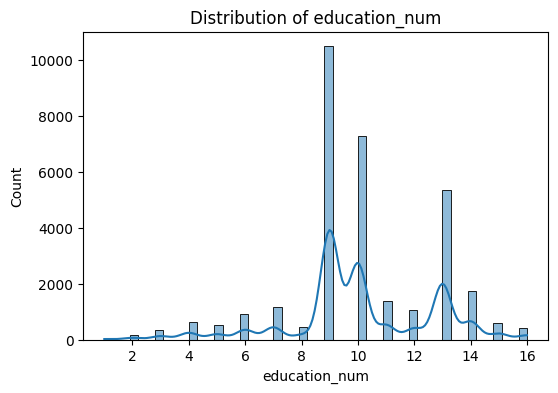

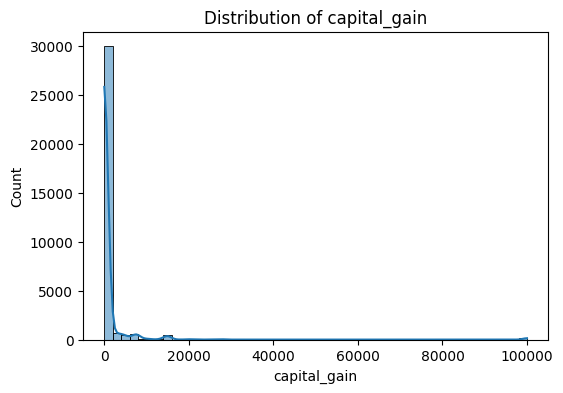

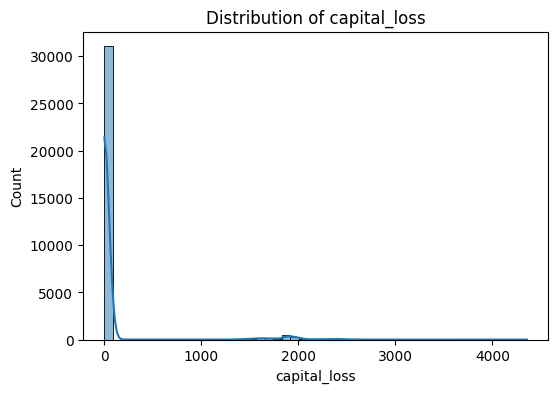

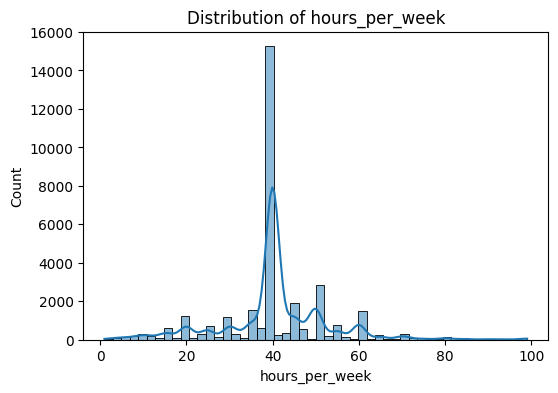

In [9]:
# Visualize distributions of numeric features
numeric_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

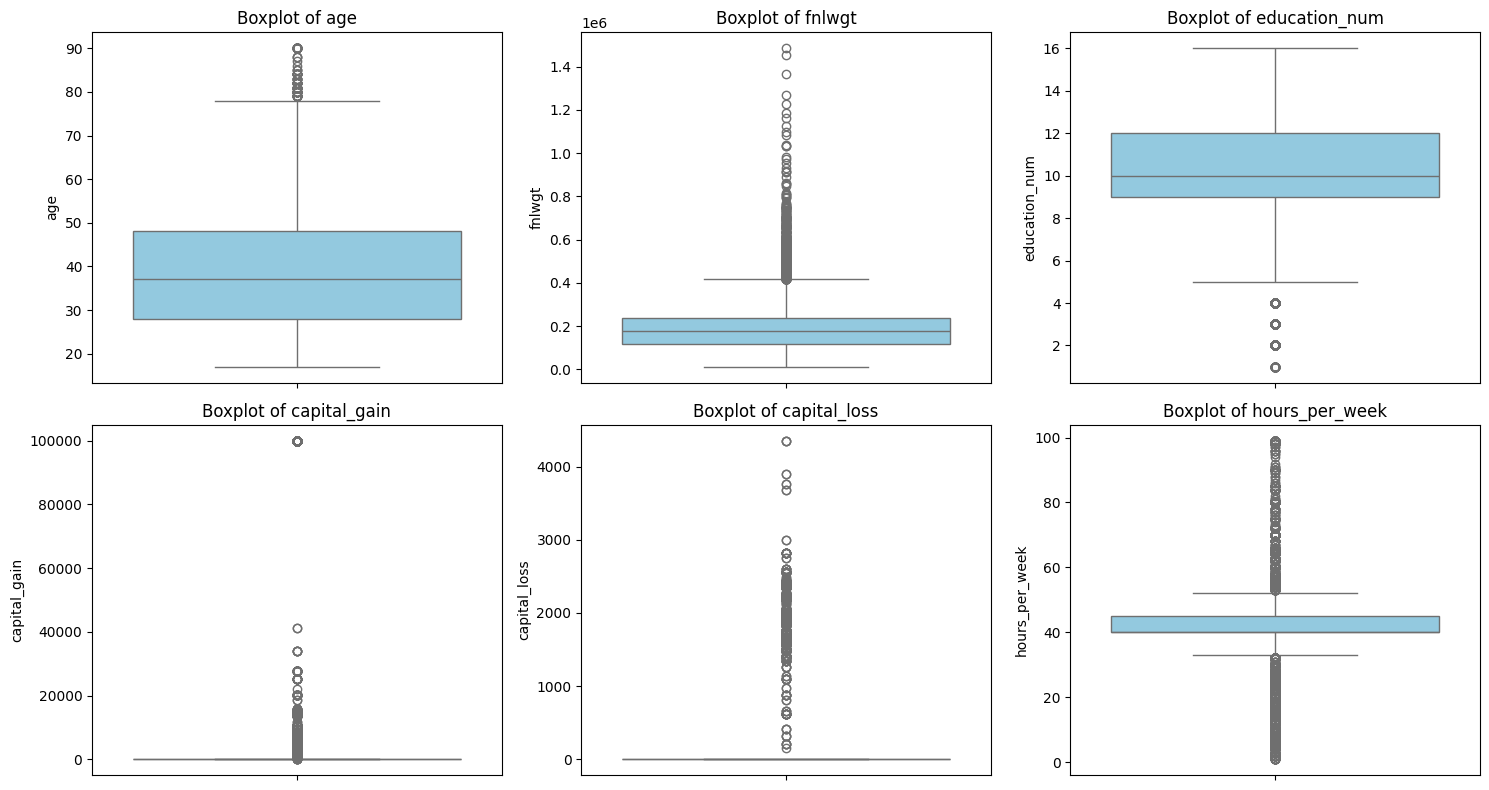

In [10]:
# Boxplots for numeric features to visualize distributions and outliers
plt.figure(figsize=(15,8))
for i, col in enumerate(numeric_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


### Scaling (Standard&MinMax)

In [11]:
# Standard Scaling
scaler_std = StandardScaler()
df_std = df.copy()
df_std[numeric_features] = scaler_std.fit_transform(df_std[numeric_features])

In [12]:
# Min-Max Scaling
scaler_mm = MinMaxScaler()
df_mm = df.copy()
df_mm[numeric_features] = scaler_mm.fit_transform(df_mm[numeric_features])

In [13]:
# Discussion:
# Standard Scaling - preferred when features follow Gaussian distribution.
# Min-Max Scaling - preferred for algorithms sensitive to magnitude (e.g., Neural Nets, KNN).

**StandardScaler:**

Transforms data to have mean = 0 and standard deviation = 1.

Best when data follows a normal (Gaussian) distribution.

Useful for algorithms like Logistic Regression, SVM, PCA.


**MinMaxScaler:**

Scales data to a fixed range [0,1].

Best when you want to preserve the shape of distribution but normalize magnitude.

Useful for Neural Networks, KNN, Gradient Descent–based models.

## Step 2: Encoding Technique

In [14]:
# Label Encoding for high-cardinality categorical features
label_features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']
le = LabelEncoder()
for col in label_features:
    df[col] = le.fit_transform(df[col])

In [15]:
# One-Hot Encoding for low-cardinality categorical features
df = pd.get_dummies(df, columns=['sex'], drop_first=True)

**One-Hot Encoding**

Pros: No ordinal relationship is assumed; good for categorical data with few categories.

Cons: Increases dimensionality if categories are many (curse of dimensionality).

**Label Encoding**

 Pros: Simple and memory-efficient.

Cons: Imposes an artificial order (e.g., red=0, blue=1, green=2) which may mislead models that assume numeric meaning (like Linear Regression).

## Step 3: Feature Engineering

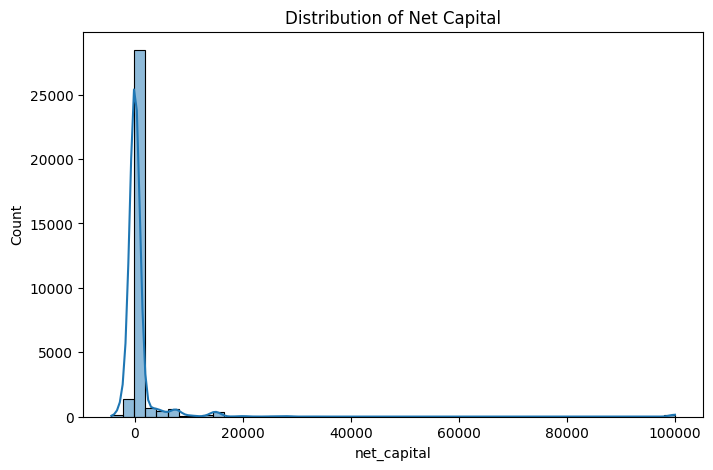

In [16]:
# Feature 1: Net Capital = capital_gain - capital_loss
df['net_capital'] = df['capital_gain'] - df['capital_loss']
plt.figure(figsize=(8,5))
sns.histplot(df['net_capital'], bins=50, kde=True)
plt.title('Distribution of Net Capital')
plt.show()

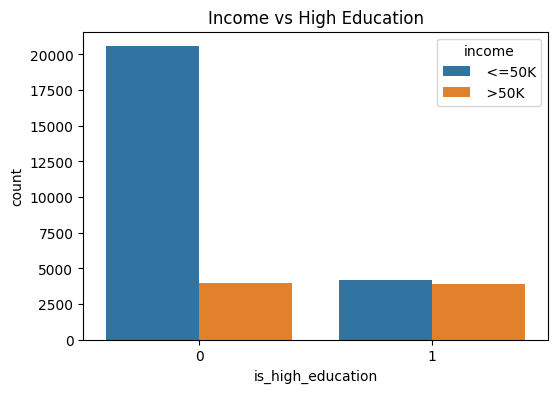

In [17]:
# Feature 2: High Education Indicator
df['is_high_education'] = df['education_num'].apply(lambda x: 1 if x >= 13 else 0)
plt.figure(figsize=(6,4))
sns.countplot(x='is_high_education', hue='income', data=df)
plt.title('Income vs High Education')
plt.show()


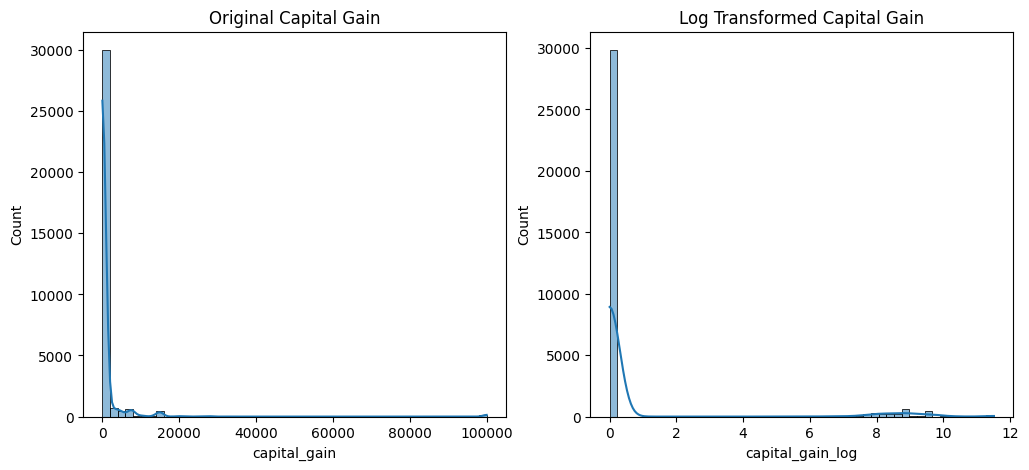

In [18]:
# Feature 3: Log Transformation of skewed feature (capital_gain)
df['capital_gain_log'] = np.log1p(df['capital_gain'])
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['capital_gain'], bins=50, kde=True)
plt.title('Original Capital Gain')
plt.subplot(1,2,2)
sns.histplot(df['capital_gain_log'], bins=50, kde=True)
plt.title('Log Transformed Capital Gain')
plt.show()

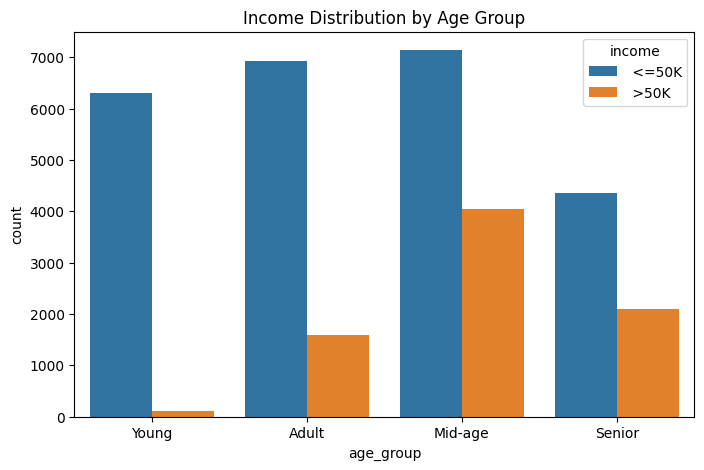

In [19]:
# Feature 4: Age Groups
df['age_group'] = pd.cut(df['age'], bins=[16,25,35,50,100], labels=['Young','Adult','Mid-age','Senior'])
plt.figure(figsize=(8,5))
sns.countplot(x='age_group', hue='income', data=df)
plt.title('Income Distribution by Age Group')
plt.show()


## Step 4: Feature Selection

In [20]:
from sklearn.ensemble import IsolationForest

In [21]:
# Select numeric features for outlier detection
iso_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 
                'capital_loss', 'hours_per_week', 'net_capital']
iso = IsolationForest(contamination=0.01, random_state=42)
df['outlier'] = iso.fit_predict(df[iso_features])


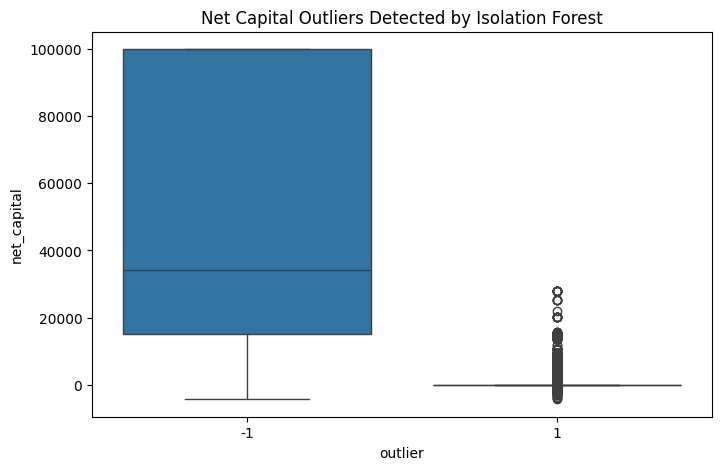

In [22]:
# Visualize Outliers in Net Capital
plt.figure(figsize=(8,5))
sns.boxplot(x='outlier', y='net_capital', data=df)
plt.title('Net Capital Outliers Detected by Isolation Forest')
plt.show()


In [23]:
# Remove Outliers
df_clean = df[df['outlier'] == 1].drop('outlier', axis=1)
print("Shape after removing outliers:", df_clean.shape)

Shape after removing outliers: (32235, 19)


**Isolation Forest and Outliers**

The Isolation Forest algorithm was applied to the numerical features of the dataset in order to detect and remove outliers. Outliers are data points that lie far away from the general distribution of the data, for example individuals with unusually high capital gains, very few or extremely high working hours per week, or rare demographic combinations.

Outliers can negatively affect machine learning models because they:
Distort statistical measures such as mean and variance.
Reduce model accuracy by forcing the algorithm to adjust to extreme cases that do not represent the majority of the population.
Increase the risk of overfitting, as the model may try to fit noise rather than meaningful patterns.

After applying Isolation Forest, the dataset became cleaner by removing the rows flagged as outliers. This ensures that the model will train on consistent and representative data, leading to more reliable predictions.

In [24]:
import ppscore as pps

In [25]:
#PPS Score Analysis
pps_matrix = pps.matrix(df_clean)
pps_target_df = pps_matrix.query("y=='income'")[['x','ppscore']].sort_values(by='ppscore', ascending=False)


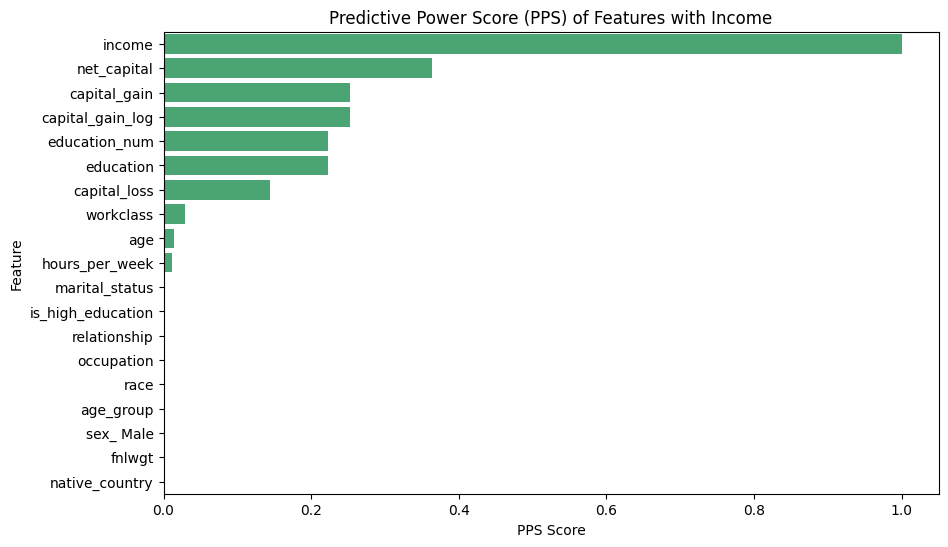

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x='ppscore', y='x', data=pps_target_df, color='mediumseagreen')
plt.title('Predictive Power Score (PPS) of Features with Income')
plt.xlabel('PPS Score')
plt.ylabel('Feature')
plt.show()

In [27]:
#Correlation Matrix
corr_features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 
                 'capital_loss', 'hours_per_week', 'net_capital', 'capital_gain_log']


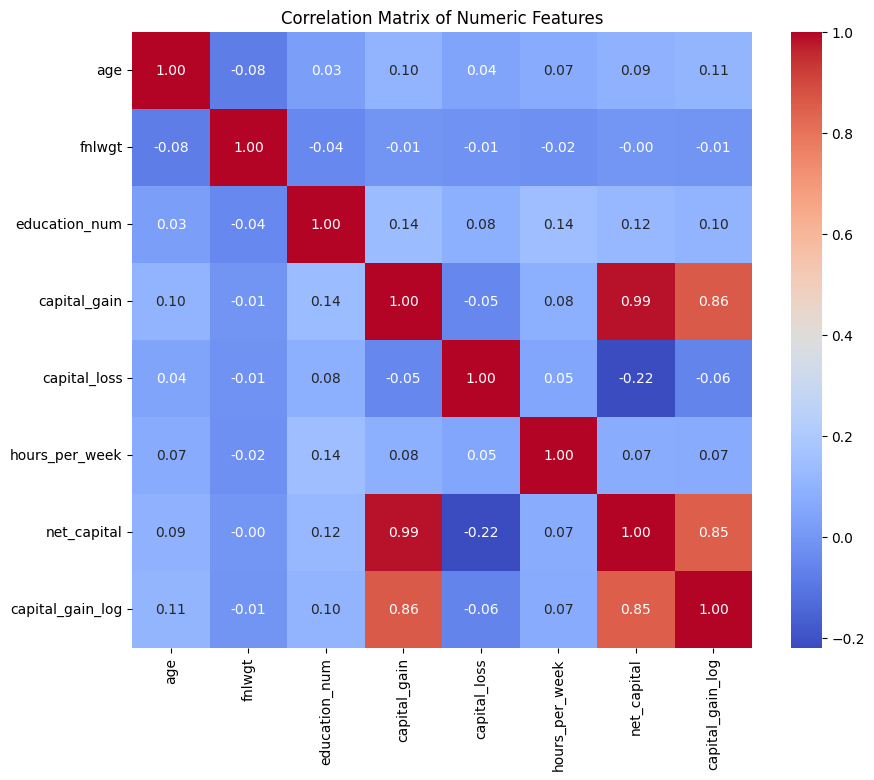

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df_clean[corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()